**Table of contents**<a id='toc0_'></a>    
- [Getting Started](#toc1_)    
- [List all the Pubsub topics](#toc2_)    
- [Create a Pubsub topic](#toc3_)    
- [Create a Subscription](#toc4_)    
  - [Why We Need Subscriptions in Google Cloud Pub/Sub](#toc4_1_)    
- [Setting up the environment](#toc5_)    
- [Publish messages](#toc6_)    
- [Receive messages](#toc7_)    
- [Clean up the topic and subscription](#toc8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Getting Started](#toc0_)

In [ ]:
gcloud auth login

In [ ]:
gcloud config set project burner-yasshaik1

# <a id='toc2_'></a>[List all the Pubsub topics](#toc0_)

In [ ]:
gcloud pubsub topics list

# <a id='toc3_'></a>[Create a Pubsub topic](#toc0_)

In [ ]:
# gcloud pubsub topics create command to create a topic named my-topic

gcloud pubsub topics create my-topic

# <a id='toc4_'></a>[Create a Subscription](#toc0_)

---

## <a id='toc4_1_'></a>[Why We Need Subscriptions in Google Cloud Pub/Sub](#toc0_)

1. **Message Delivery**: Subscriptions ensure that messages published to a topic are delivered to subscribers. Without a subscription, there would be no mechanism to receive messages.

2. **Decoupling**: Subscriptions decouple publishers from subscribers, allowing each to operate independently. Publishers send messages without needing to know who will consume them, and subscribers receive messages without knowing the source.

3. **Message Retention and Replay**: Subscriptions can retain messages for a period, allowing subscribers to process messages at their own pace. Subscriptions also enable replaying messages if needed.

4. **Scaling**: Subscriptions support scalable message processing by distributing messages across multiple subscribers, allowing for load balancing and parallel processing.

5. **Acknowledgment**: Subscriptions track message acknowledgment, ensuring that messages are delivered at least once and can be retried if not acknowledged.

In summary, subscriptions are necessary for delivering, managing, and processing messages efficiently in Google Cloud Pub/Sub.


In [ ]:
gcloud pubsub subscriptions create my-sub --topic my-topic

In [ ]:
gcloud pubsub subscriptions create my-sub --topic my-topic

# <a id='toc5_'></a>[Setting up the environment](#toc0_)

In [ ]:
# Step 1: Ensure you have virtualenv installed to install any GCP Package
pip install virtualenv

# Step 2: Create a virtual environment (replace 'myenv' with your desired environment name)
virtualenv myenv

# Step 3: Activate the virtual environment
# On Windows
myenv\Scripts\activate
# On macOS/Linux
source myenv/bin/activate

# Step 4: Upgrade pip (optional but recommended)
pip install --upgrade pip

# Step 5: Install the Google Cloud Pub/Sub package
pip install --upgrade google-cloud-pubsub

# <a id='toc6_'></a>[Publish messages](#toc0_)

In [ ]:
from google.cloud import pubsub_v1

# TODO(developer)
project_id = "burner-yasshaik1"
# topic_id = "my-topic"
topic_id = "DAILY_UPDATES_TABLE_TOPIC"

publisher = pubsub_v1.PublisherClient()
# The `topic_path` method creates a fully qualified identifier
# in the form `projects/{project_id}/topics/{topic_id}`
topic_path = publisher.topic_path(project_id, topic_id)

for n in range(1, 10):
    data_str = f"Message number {n}"
    # Data must be a bytestring
    data = data_str.encode("utf-8")
    # When you publish a message, the client returns a future.
    future = publisher.publish(topic_path, data)
    print(future.result())

print(f"Published messages to {topic_path}.")

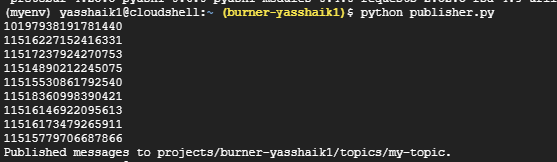

# <a id='toc7_'></a>[Receive messages](#toc0_)

In [ ]:
from concurrent.futures import TimeoutError
from google.cloud import pubsub_v1


project_id = "burner-yasshaik1"
subscription_id = "my-sub"
timeout = 30.0 # Number of seconds the subscriber should listen for messages

subscriber = pubsub_v1.SubscriberClient()

# The `subscription_path` method creates a fully qualified identifier # in the form `projects/{project_id}/subscriptions/{subscription_id}`
subscription_path = subscriber.subscription_path(project_id, subscription_id) # It should be like this - projects/burner-yasshaik1/subscriptions/my-sub


def callback(message: pubsub_v1.subscriber.message.Message) -> None:
    print(f"Received {message}.")
    message.ack()

streaming_pull_future = subscriber.subscribe(subscription_path, callback=callback)
print(f"Listening for messages on {subscription_path}..\n")

# Wrap subscriber in a 'with' block to automatically call close() when done.
with subscriber:
    try:
        # When `timeout` is not set, result() will block indefinitely,
        # unless an exception is encountered first.
        streaming_pull_future.result(timeout=timeout)
    except TimeoutError:
        streaming_pull_future.cancel()  # Trigger the shutdown.
        streaming_pull_future.result()  # Block until the shutdown is complete.

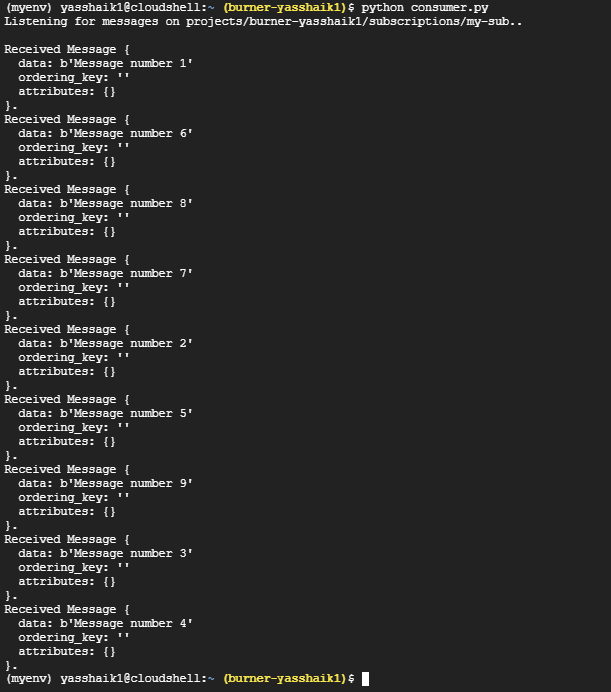

# <a id='toc8_'></a>[Clean up the topic and subscription](#toc0_)

In [ ]:
  gcloud pubsub subscriptions delete my-sub
  gcloud pubsub topics delete my-topic